In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
YOLO_READY_DIR = "/content/drive/MyDrive/thermo_yolo/yolo_ready_dataset"
LOCAL_DIR      = "/content/yolo_ready_dataset"
import os, shutil

if not os.path.exists(LOCAL_DIR):
    print("📦 Copying dataset to local disk...")
    shutil.copytree(YOLO_READY_DIR, LOCAL_DIR)
else:
    print("✅ Local copy exists.")

DATA_YAML = f"{LOCAL_DIR}/thermal_dataset.yaml"
print("🔍 DATA_YAML =", DATA_YAML)


📦 Copying dataset to local disk...
🔍 DATA_YAML = /content/yolo_ready_dataset/thermal_dataset.yaml


In [ ]:
!pip install ultralytics matplotlib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.4 MB/s eta 0:00:00


In [ ]:


from ultralytics import YOLO
import torch

device = 0 if torch.cuda.is_available() else 'cpu'
print("🚀 Device:", device)

# Re-create YAML file (in case it's missing)
yaml_content = f"""
path: {LOCAL_DIR}
train: images/train
val: images/val
nc: 2
names:
  0: Human
  1: Dog
""".strip()
with open(DATA_YAML, "w") as f:
    f.write(yaml_content)
print("✅ YAML (re)written at:", DATA_YAML)


🚀 Device: cpu
✅ YAML (re)written at: /content/yolo_ready_dataset/thermal_dataset.yaml


Text(0.5, 1.0, 'Training Curves')

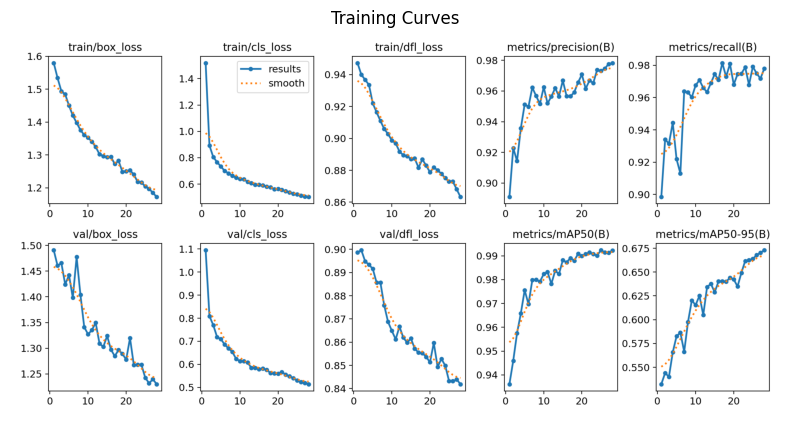

In [ ]:
from ultralytics.utils.plotting import plot_results
import matplotlib.pyplot as plt

csv_path = "/content/drive/MyDrive/thermo_yolo/runs/train1/results.csv"
plot_results(file=csv_path)

img = plt.imread("/content/drive/MyDrive/thermo_yolo/runs/train1/results.png")
plt.figure(figsize=(10,5))
plt.imshow(img)
plt.axis('off')
plt.title("Training Curves")


Ultralytics 8.3.155 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1299.9±523.1 MB/s, size: 86.5 KB)


val: Scanning /content/yolo_ready_dataset/labels/val.cache... 1268 images, 12 backgrounds, 0 corrupt: 100%|██████████| 1268/1268 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 80/80 [02:34<00:00,  1.93s/it]


                   all       1268       1883      0.978      0.978      0.992      0.673
                 Human       1256       1883      0.978      0.978      0.992      0.673
Speed: 2.6ms preprocess, 108.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val3
📊 Box Precision: [    0.97821]
📊 Box Recall: [    0.97767]
📊 Box mAP@0.5: 0.9922182926925729
📊 Box mAP@0.5:0.95: 0.6727363426995451

image 1/1 /content/yolo_ready_dataset/images/val/5227.jpg: 320x416 1 Human, 125.5ms
Speed: 1.9ms preprocess, 125.5ms inference, 4.2ms postprocess per image at shape (1, 3, 320, 416)

image 1/1 /content/yolo_ready_dataset/images/val/5254.jpg: 320x416 1 Human, 78.9ms
Speed: 2.2ms preprocess, 78.9ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

image 1/1 /content/yolo_ready_dataset/images/val/824.jpg: 320x416 3 Humans, 78.4ms
Speed: 1.8ms preprocess, 78.4ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 416)


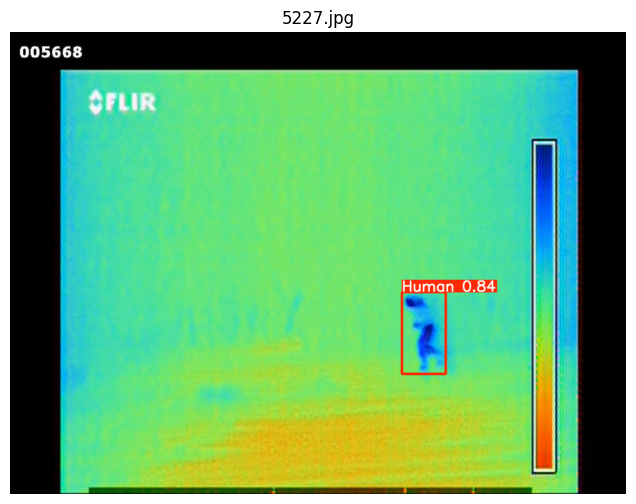

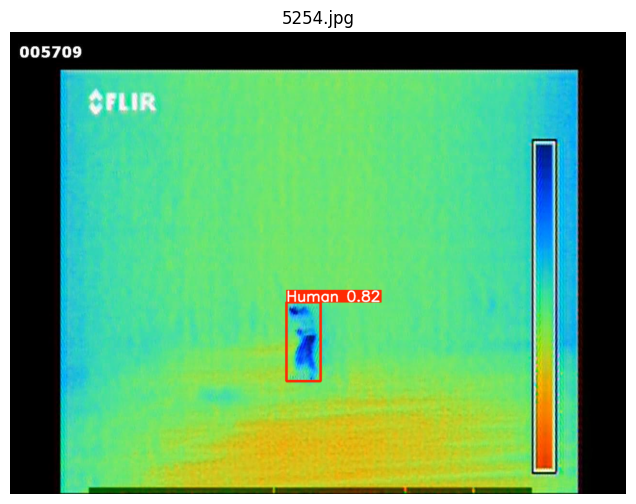

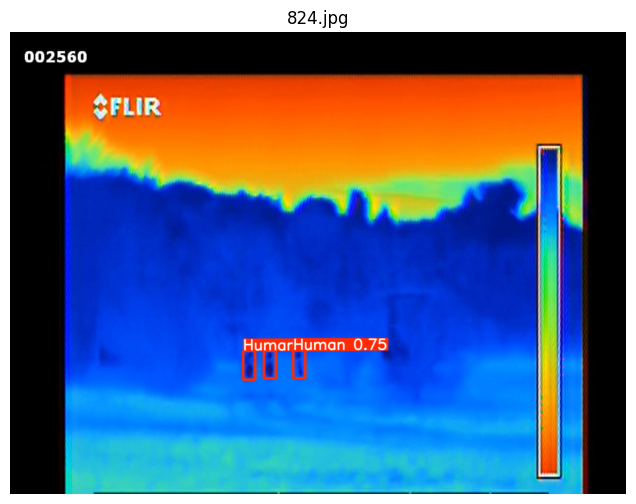

In [11]:
from pathlib import Path
import matplotlib.pyplot as plt

best_weights = "/content/drive/MyDrive/thermo_yolo/runs/train1/weights/best.pt"
model = YOLO(best_weights)

val_metrics = model.val(data=DATA_YAML)
print("📊 Box Precision:", val_metrics.box.p)      # precision per class
print("📊 Box Recall:", val_metrics.box.r)         # recall per class
print("📊 Box mAP@0.5:", val_metrics.box.map50)    # mAP@0.5
print("📊 Box mAP@0.5:0.95:", val_metrics.box.map) # mAP@0.5:0.95


VAL_IMAGES = Path(f"{LOCAL_DIR}/images/val")
for img_path in list(VAL_IMAGES.glob("*.jpg"))[:3]:
    res = model(img_path)
    annotated = res[0].plot()
    plt.figure(figsize=(8,6))
    plt.imshow(annotated)
    plt.title(img_path.name)
    plt.axis('off')


In [12]:
import os
from PIL import Image

# Folder where predicted images will be saved
PRED_DIR = "/content/drive/MyDrive/thermo_yolo/predictions_val"
os.makedirs(PRED_DIR, exist_ok=True)

# Now loop again over val images and save predictions
for img_path in VAL_IMAGES.glob("*.jpg"):
    res = model(img_path)
    annotated = res[0].plot()  # NumPy array with boxes
    out_path = os.path.join(PRED_DIR, img_path.name)
    Image.fromarray(annotated).save(out_path)

print(f"✅ All predictions saved to: {PRED_DIR}")



image 1/1 /content/yolo_ready_dataset/images/val/5227.jpg: 320x416 1 Human, 80.5ms
Speed: 2.3ms preprocess, 80.5ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 416)

image 1/1 /content/yolo_ready_dataset/images/val/5254.jpg: 320x416 1 Human, 76.7ms
Speed: 1.8ms preprocess, 76.7ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

image 1/1 /content/yolo_ready_dataset/images/val/824.jpg: 320x416 3 Humans, 78.1ms
Speed: 1.8ms preprocess, 78.1ms inference, 1.2ms postprocess per image at shape (1, 3, 320, 416)

image 1/1 /content/yolo_ready_dataset/images/val/7108.jpg: 320x416 1 Human, 75.3ms
Speed: 1.8ms preprocess, 75.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

image 1/1 /content/yolo_ready_dataset/images/val/5043.jpg: 320x416 1 Human, 77.6ms
Speed: 1.7ms preprocess, 77.6ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 416)

image 1/1 /content/yolo_ready_dataset/images/val/054.jpg: 320x416 3 Humans, 74.3ms
Speed: 1.8m